# Org Chart playbook zero

### Creating a dot file from YAML

Imagine we have the following organisation in YAML:

In [1]:
s = """
nodes:
  # PEOPLE in the corresponding pillar
  # `status` can be: perm|contractor|starting|leaving|new
  # `note` is an optional property and should be short if present as will be concatenated to 20 chars
  # `team` is an optional property and will result in team name being shown above node
  - id: 'Mickey Mouse'
    level: 1
    status: 'perm'
    manager: 'yes'
  # Engineering Managers
  - id: 'Donald Duck'
    level: 2
    status: 'leaving'
    manager: 'yes'
    note: 'leaving 30.03.23'
  - id: 'Daffy Duck'
    level: 2
    status: 'starting'
    manager: 'yes'
    note: 'starting 03.04.23'
  # Staff Engineers
  - id: 'Pluto Dog'
    level: 3
    status: 'perm'
    manager: 'no'
    team: 'Bark'
  - id: 'Bluto Dog'
    level: 3
    status: 'perm'
    manager: 'yes'
    team: 'Bite'
  # Bark Engineering
  - id: 'Cakey Dog'
    level: 4
    status: 'perm'
    manager: 'no'
    team: 'Bark'
  - id: 'Flakey Dog'
    level: 4
    status: 'perm'
    manager: 'no'
    team: 'Bark'
  - id: 'Big Bad Dog'
    level: 4
    status: 'perm'
    manager: 'no'
    team: 'Bark'
  - id: 'Sean Dog'
    level: 4
    status: 'contractor'
    manager: 'no'
    team: 'Bork'
    note: 'Special Operations'
  # Bite Engineering
  - id: 'Floella Dog'
    level: 4
    status: 'moving'
    manager: 'no'
    note: 'moving ??.04.23'
    team: 'Bite'
  - id: 'Moella Dog'
    level: 4
    status: 'perm'
    manager: 'no'
    team: 'Bite'
  - id: 'Rowenna Dog'
    level: 4
    status: 'perm'
    manager: 'no'
    team: 'Bite'
    

edges:
  # relationship 1 for direct management.
  # relationship 2 for indirect management. eg. tech lead
  # relationship 3 for a perm yet to join.
  # relationship 4 for a perm leaving.
  - source: 'Mickey Mouse'
    target: 'Donald Duck'
    label: 'Engineering Manager'
    relationship: 4
  - source: 'Mickey Mouse'
    target: 'Daffy Duck'
    label: 'Engineering Manager'
    relationship: 3
  # Bark team
  - source: 'Donald Duck'
    target: 'Pluto Dog'
    label: 'Staff Engineer'
    relationship: 1
  - source: 'Pluto Dog'
    target: 'Cakey Dog'
    label: 'Engineer'
    relationship: 2
  - source: 'Pluto Dog'
    target: 'Flakey Dog'
    label: 'Engineer'
    relationship: 2
  - source: 'Pluto Dog'
    target: 'Big Bad Dog'
    label: 'Engineer'
    relationship: 2
  - source: 'Pluto Dog'
    target: 'Sean Dog'
    label: 'Contractor'
    relationship: 2
  # Bite team
  - source: 'Daffy Duck'
    target: 'Bluto Dog'
    label: 'Staff Engineer'
    relationship: 1
  - source: 'Bluto Dog'
    target: 'Floella Dog'
    label: 'Engineer'
    relationship: 2
  - source: 'Bluto Dog'
    target: 'Moella Dog'
    label: 'Engineer'
    relationship: 2
  - source: 'Bluto Dog'
    target: 'Rowenna Dog'
    label: 'Engineer'
    relationship: 2

"""
with open('test.yaml', 'w') as f:
    f.write(s)

In [2]:
!ls -al test.yaml

-rw-r--r--  1 Mal  staff  2797 30 Mar 19:54 test.yaml


We can now try to build out a dot file.  In this example we are injecting a newline in the name text to force it onto newlines later on.  You want to switch this to `False` for rendering in a dot file editor.

In [3]:
import os
from organogram import OrganisationDiagrammer

org = OrganisationDiagrammer()
g = org.create_graph_from_yaml(org.load_yaml_file('test.yaml'),newline=True)
dotfile = org.create_dotfile_from_graph(g, dot_file='test.dot')

In [4]:
!ls -al test.dot

-rw-r--r--  1 Mal  staff  1727 30 Mar 19:54 test.dot


We can now import this dot file into a dot file editor such as [Graphity](https://www.graphity.com/) which we have running in Confluence as a trial.  You open and save a Graphity widget into a Confluence page and then click the widget to import your dot file.  You should then be able to edit it in the browser as shown in the screenshot below.

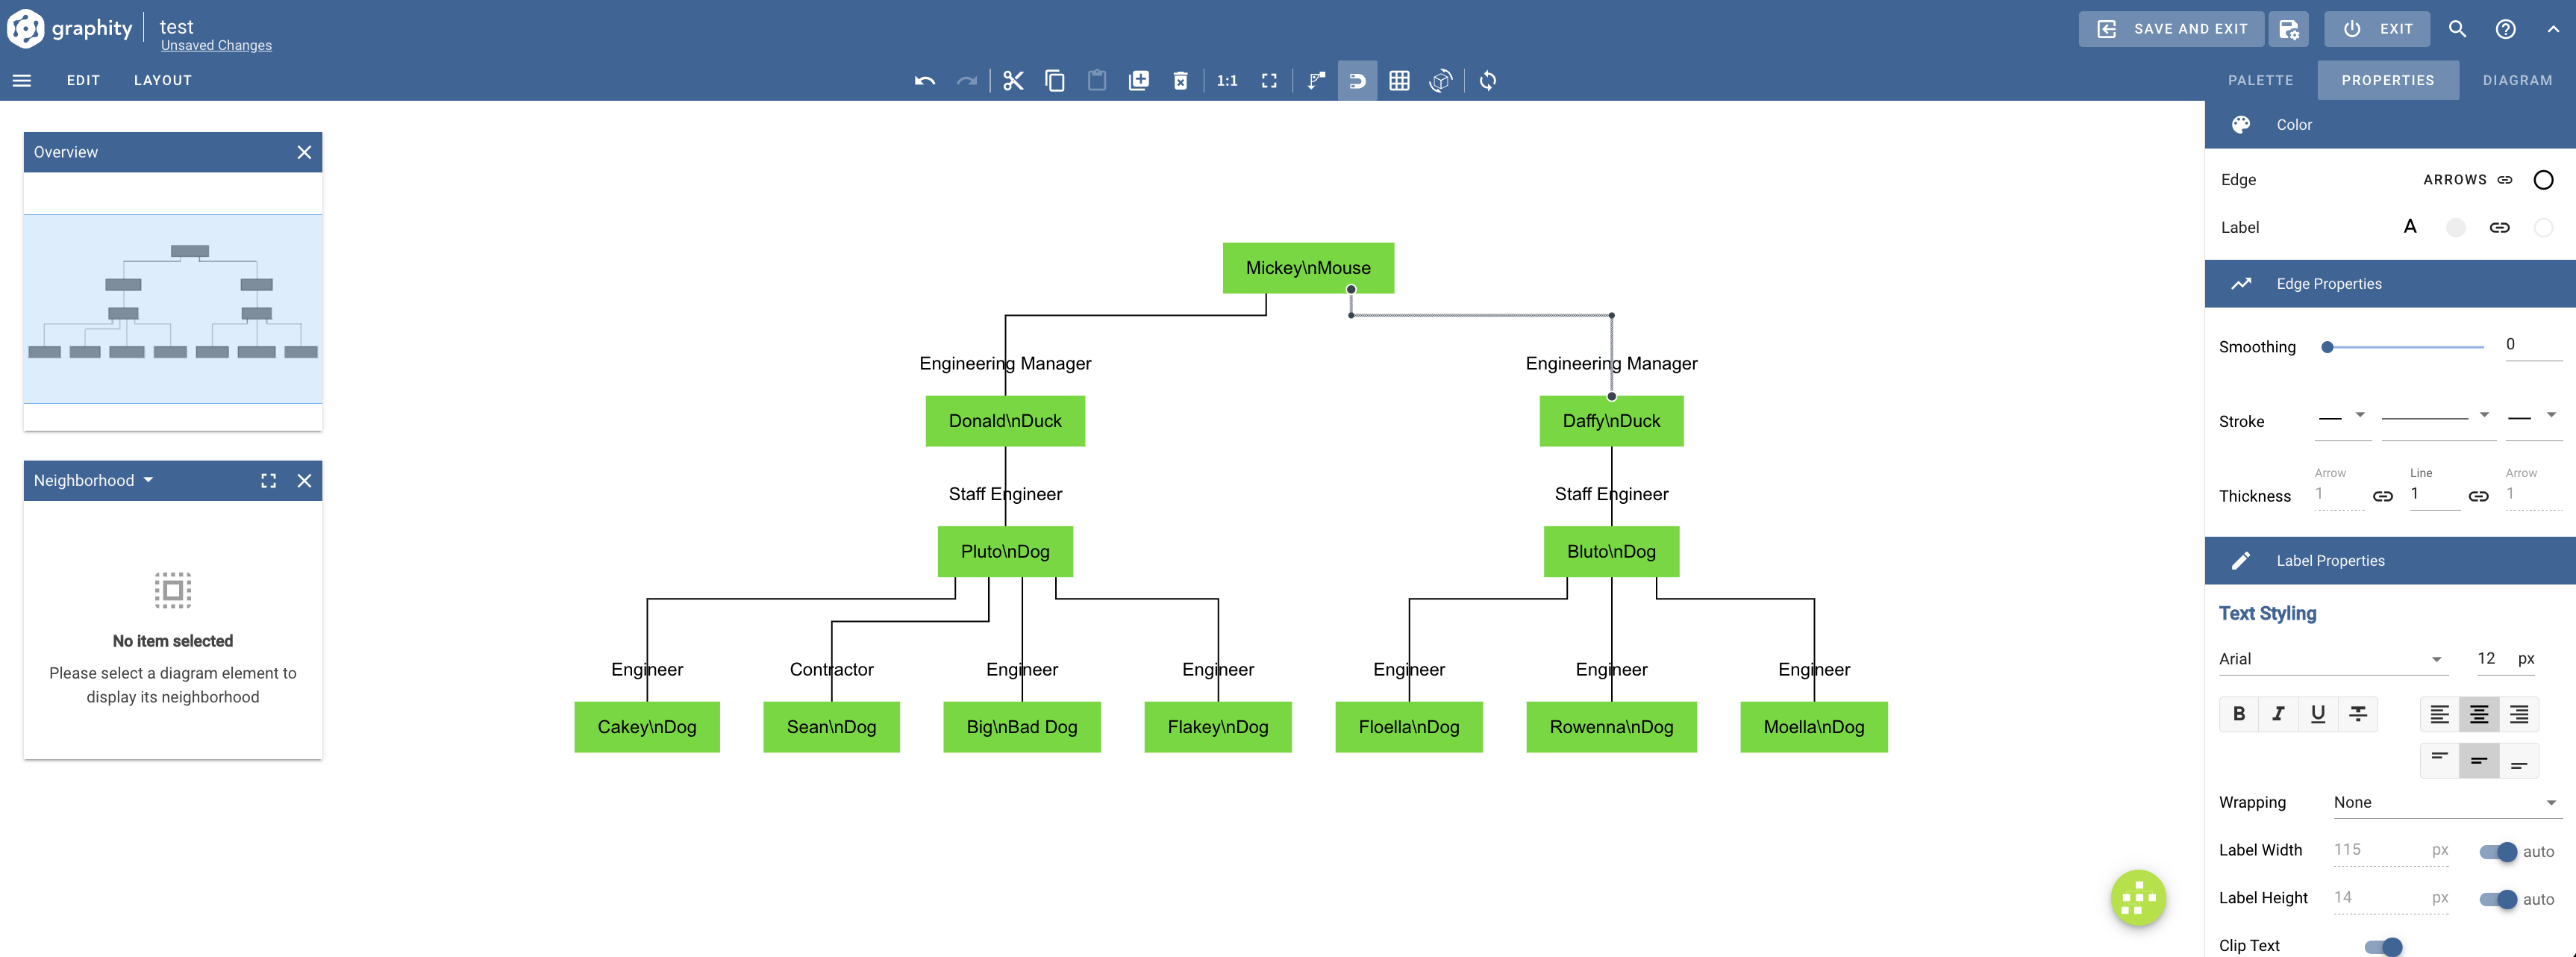

In [5]:
from IPython.display import Image as ImageDisplay, Markdown, display

def displayImage(im_file, width=1200):
    display(ImageDisplay(im_file, width=width))

displayImage('graphity.png')

The accompanying `organogram` Python module can also attempt to render an org chart using the Python `networkx` module.  This is a bit fiddly to get right in terms

### Running it on a real world org example

Successfully generated organogram into file test.png of size 162.7kB


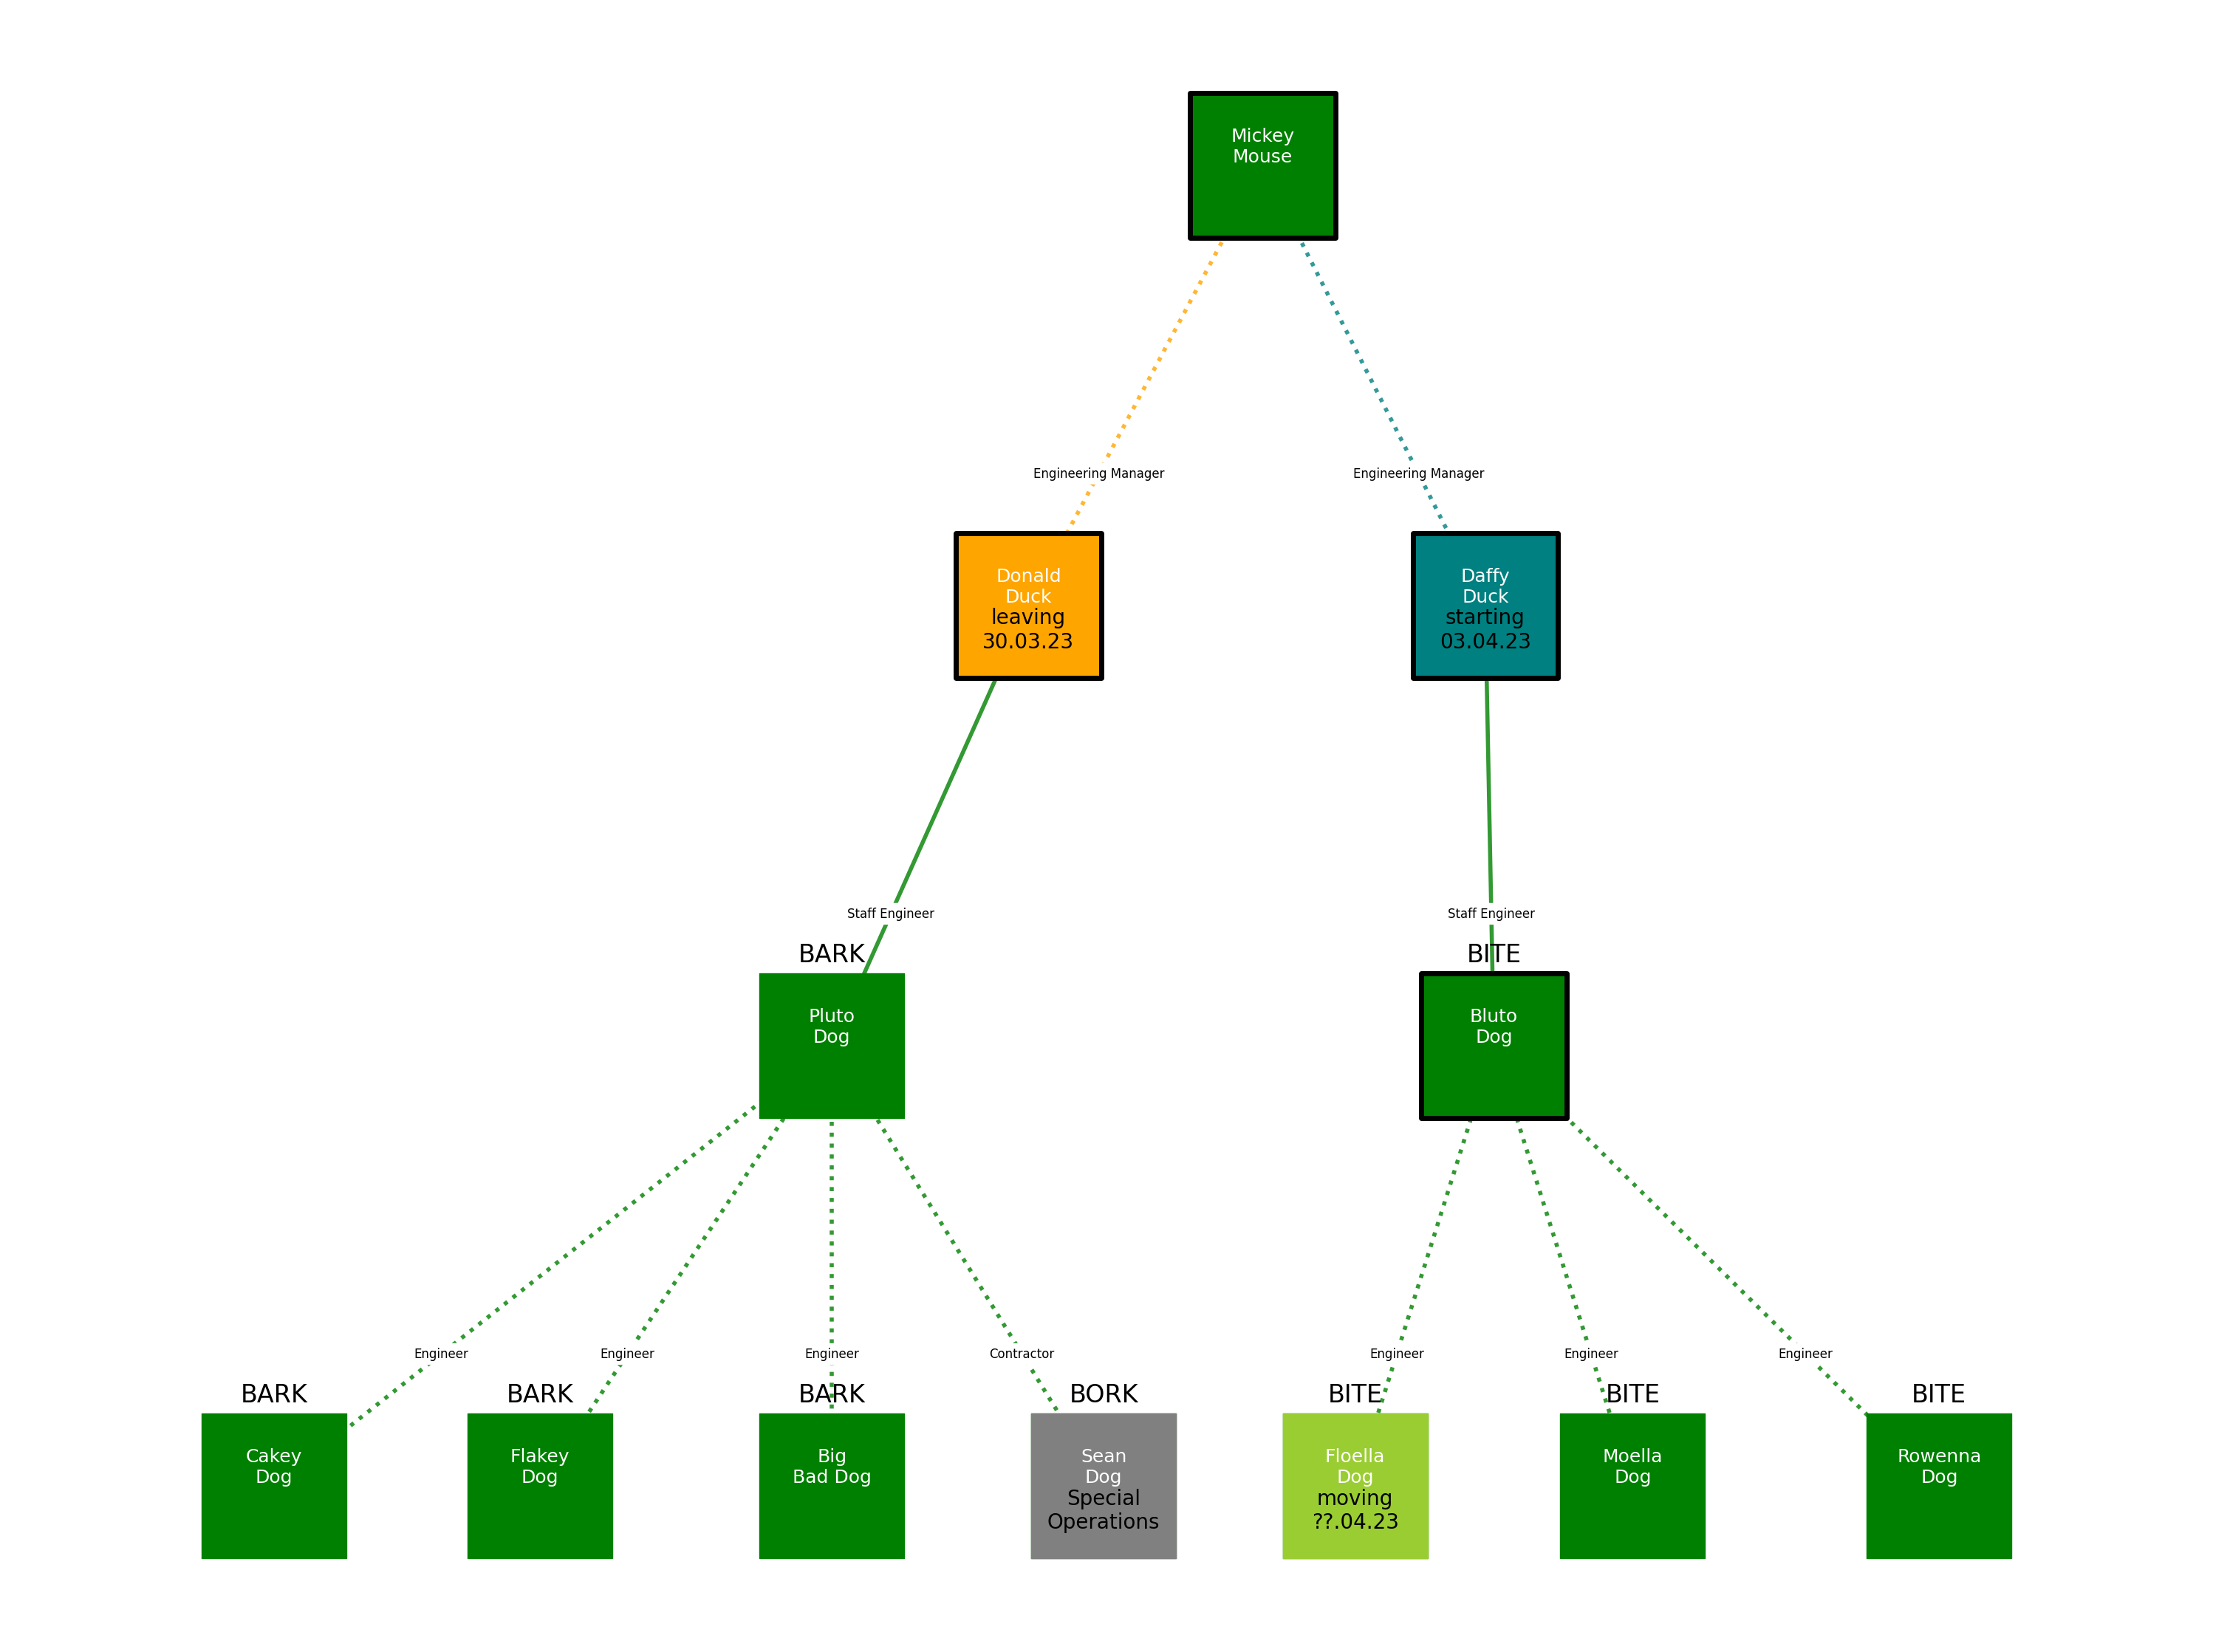

In [6]:
import os
from organogram import OrganisationDiagrammer

target = 'test.png'
org.create_graphviz_layout_from_graph(g, scale=6, offset=20, node_size=20000, image_file=target)
print(f'Successfully generated organogram into file {target} of size {round(os.path.getsize(target)/1024,1)}kB')